In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('song_lyrics.csv')

In [3]:
df.head()

,title,tag,artist,year,views,features,lyrics,id,language_cld3,language_ft,language
0,Killa Cam,rap,Cam'ron,2004,173166,"{""Cam\\'ron"",""Opera Steve""}","[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...",1,en,en,en
1,Can I Live,rap,JAY-Z,1996,468624,{},"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,...",3,en,en,en
2,Forgive Me Father,rap,Fabolous,2003,4743,{},Maybe cause I'm eatin\nAnd these bastards fien...,4,en,en,en
3,Down and Out,rap,Cam'ron,2004,144404,"{""Cam\\'ron"",""Kanye West"",""Syleena Johnson""}",[Produced by Kanye West and Brian Miller]\n\n[...,5,en,en,en
4,Fly In,rap,Lil Wayne,2005,78271,{},"[Intro]\nSo they ask me\n""Young boy\nWhat you ...",6,en,en,en


In [4]:
df.tail()

,title,tag,artist,year,views,features,lyrics,id,language_cld3,language_ft,language
5134851,Ocean,pop,Effemar,2022,3,{},[Verse 1]\nDance for me now\nKeeping yourself ...,7882842,en,en,en
5134852,64 Bars,rap,Rapido,2022,4,{},"[Intro]\n\nJa, ja\n\n[Part 1]\n\nR-A-H, Merhab...",7882843,de,de,de
5134853,Raise Our Hands,pop,"Culture Code, Pag & Mylo",2016,3,"{Elex,""Culture Code / Pag & Mylo""}",[Verse 1]\nHere our purpose feels alive\nWe ar...,7882845,en,en,en
5134854,CEO,rap,Antropolita,2022,5,{},Jestem CEO w tym\nTo jara twoją bitch\nNikt na...,7882846,pl,pl,pl
5134855,New Number,country,Alana Springsteen,2022,1,{},"[Verse 1]\nYou need a new number, one that ain...",7882848,en,en,en


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


title               188
tag                   0
artist                0
year                  0
views                 0
features              0
lyrics                0
id                    0
language_cld3     90966
language_ft      134322
language         226918
dtype: int64


In [6]:
# dropping null instances
df = df.dropna()

In [7]:
# making sure that there is no more null values 
verify_null = df.isnull().sum()
print(verify_null)


title            0
tag              0
artist           0
year             0
views            0
features         0
lyrics           0
id               0
language_cld3    0
language_ft      0
language         0
dtype: int64


In [8]:
# dropping unnecessry columns
# Drop the columns 'features', 'id', 'language_cld3', and 'language_ft'
df = df.drop(columns=['features', 'id', 'language_cld3', 'language_ft'])
df.head()

,title,tag,artist,year,views,lyrics,language
0,Killa Cam,rap,Cam'ron,2004,173166,"[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...",en
1,Can I Live,rap,JAY-Z,1996,468624,"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,...",en
2,Forgive Me Father,rap,Fabolous,2003,4743,Maybe cause I'm eatin\nAnd these bastards fien...,en
3,Down and Out,rap,Cam'ron,2004,144404,[Produced by Kanye West and Brian Miller]\n\n[...,en
4,Fly In,rap,Lil Wayne,2005,78271,"[Intro]\nSo they ask me\n""Young boy\nWhat you ...",en


In [9]:
# keeping only English lyrics data
df = df[df['language'] == 'en']


In [10]:
#showing nan in lyrics
nan_lyrics = df[df['lyrics'].isna()]
print("Rows with NaN values in the 'lyrics' column:")
print(nan_lyrics)


Rows with NaN values in the 'lyrics' column:
Empty DataFrame
Columns: [title, tag, artist, year, views, lyrics, language]
Index: []


In [11]:
# checking for values in string otherthan strings
non_string_lyrics = df[df['lyrics'].apply(lambda x: not isinstance(x, str))]
print("Rows with non-string values in the 'lyrics' column:")
print(non_string_lyrics)


Rows with non-string values in the 'lyrics' column:
Empty DataFrame
Columns: [title, tag, artist, year, views, lyrics, language]
Index: []


In [12]:
# cheking unique
unique_values = df.nunique()
unique_values

title       1842628
tag               6
artist       429044
year            591
views         72588
lyrics      3316116
language          1
dtype: int64

In [13]:
# counting artist 
df.artist.value_counts()

artist
Genius English Translations    13671
The Grateful Dead               2110
Emily Dickinson                 1619
Abraham Lincoln                 1492
Lil B                           1310
                               ...  
Native Sound System                1
DRIPPY 333                         1
Lil Pixie                          1
Lamb Bed                           1
Clara Mae & Maximillian            1
Name: count, Length: 429044, dtype: int64

In [14]:
# removing Genious generated lyrics 
df = df[~df['artist'].str.contains('genius', case=False)]

In [15]:
# counting tag 
df.tag.value_counts()

tag
pop        1384853
rap         959188
rock        632037
rb          154373
misc        139206
country      86598
Name: count, dtype: int64

In [16]:
# keeping only popular music types
df = df[df['tag'].isin(['pop', 'rap', 'rock'])]


In [17]:
import re
# perform text cleaning steps on the artist column 
def clean_artist(artist_name):
    artist_name = artist_name.lower().strip()
    artist_name = re.sub('[^A-Za-z0-9\s]', '', artist_name)
    return artist_name

df['artist'] = df['artist'].apply(clean_artist)


In [18]:
# The top 100 artists along with their tags, view counts, and the count of titles (number of songs), sorted by view count in descending order
top_artists_tags_titles = df.groupby(['artist', 'tag']).agg({
    'views': 'sum',
    'title': 'count'
}).sort_values(by='views', ascending=False).head(100)
top_artists_tags_titles_df = top_artists_tags_titles.reset_index()

print(top_artists_tags_titles_df)

                    artist   tag      views  title
0                    drake   rap  240077123    430
1                   eminem   rap  199733026    496
2               kanye west   rap  155618922    773
3           kendrick lamar   rap  148398293    326
4                   j cole   rap   95482502    278
..                     ...   ...        ...    ...
95         imagine dragons  rock   15141309    135
96  ski mask the slump god   rap   15077276    201
97                  dr dre   rap   14912139    140
98              bruno mars   pop   14894571    109
99               tech n9ne   rap   14545811    633

[100 rows x 4 columns]


In [19]:
# List of artist names to keep only those artist for final data
artist_names = [
    "taylor swift", "ariana grande", "billie eilish", "ed sheeran", "justin bieber",
    "halsey", "maroon 5", "lady gaga", "arctic monkeys", "the beatles", 
    "queen", "pink floyd", "nirvana", "imagine dragons", "drake", 
    "eminem", "cardi b", "post malone", "travis scott", "21 savage",
    "dj khaled", "machine gun kelly"
]

# Filter the DataFrame to keep only rows where the 'artist' column matches an artist in the list
filtered_df = df[df['artist'].isin(artist_names)]

# Check if any expected artists are missing in the DataFrame
artists_in_df = set(filtered_df['artist'].unique())
missing_artists = [artist for artist in artist_names if artist not in artists_in_df]

if missing_artists:
    print("Warning: The following artists were not found in the DataFrame:", missing_artists)
else:
    print("All specified artists were found in the DataFrame.")

# Show some of the filtered DataFrame for verification
print(filtered_df.head())


All specified artists were found in the DataFrame.
                      title  tag  artist  year    views  \
22   Encore / Curtains Down  rap  eminem  2004   187204   
75               My Name Is  rap  eminem  1999  1464039   
104       Yellow Brick Road  rap  eminem  2004   308640   
144                    Stan  rap  eminem  2000  3298983   
145                Kill You  rap  eminem  2000   982504   

                                                lyrics language  
22   [Intro: 50 Cent & Eminem]\nSh-sh-sh, Shady! Af...       en  
75   [Produced by Dr. Dre]\n\n[Chorus: Eminem]\nHi,...       en  
104  [Intro: Morris Casuto, Spiro Agnew, Randy Blaz...       en  
144  [Produced by DJ Mark the 45 King]\n\n[Chorus: ...       en  
145  [Produced by Dr. Dre & Mel-Man]\n\n[Intro]\nWh...       en  


In [20]:
filtered_df.head()

,title,tag,artist,year,views,lyrics,language
22,Encore / Curtains Down,rap,eminem,2004,187204,"[Intro: 50 Cent & Eminem]\nSh-sh-sh, Shady! Af...",en
75,My Name Is,rap,eminem,1999,1464039,"[Produced by Dr. Dre]\n\n[Chorus: Eminem]\nHi,...",en
104,Yellow Brick Road,rap,eminem,2004,308640,"[Intro: Morris Casuto, Spiro Agnew, Randy Blaz...",en
144,Stan,rap,eminem,2000,3298983,[Produced by DJ Mark the 45 King]\n\n[Chorus: ...,en
145,Kill You,rap,eminem,2000,982504,[Produced by Dr. Dre & Mel-Man]\n\n[Intro]\nWh...,en


In [21]:
filtered_df.count()

title       6391
tag         6391
artist      6391
year        6391
views       6391
lyrics      6391
language    6391
dtype: int64

In [22]:
'''
# perform text cleaning steps on the lyrics column 

def clean_lyrics(text):
    text = text.lower()
    text = re.sub('\n', ' ', text)  # Replace newline with space
    text = re.sub(r"\[.*?\]|\(.*?\)", "", text)  # Remove brackets and their content
    text = text.strip()
    text = re.sub('[^A-Za-z0-9\s]', '', text)  # Remove special characters
    return text

filtered_df['lyrics'] = filtered_df['lyrics'].apply(clean_lyrics)
'''


'\n# perform text cleaning steps on the lyrics column \n\ndef clean_lyrics(text):\n    text = text.lower()\n    text = re.sub(\'\n\', \' \', text)  # Replace newline with space\n    text = re.sub(r"\\[.*?\\]|\\(.*?\\)", "", text)  # Remove brackets and their content\n    text = text.strip()\n    text = re.sub(\'[^A-Za-z0-9\\s]\', \'\', text)  # Remove special characters\n    return text\n\nfiltered_df[\'lyrics\'] = filtered_df[\'lyrics\'].apply(clean_lyrics)\n'

In [23]:
import pandas as pd
import re
import nltk

# Ensure the tokenizer from NLTK is available
nltk.download('punkt')

def preprocess_lyrics(lyrics):
    if not isinstance(lyrics, str):
        return ""
    
    # Normalize text: lowercase
    processed = lyrics.lower()
    
    # Maintain punctuation by adding spaces around it for better token separation
    processed = re.sub('\n', ' ', processed) 
    processed = re.sub(r'([.,!?;])', r' \1 ', processed)
    processed = re.sub(r'\s{2,}', ' ', processed)  # Remove extra whitespace
    processed = re.sub(r"\[.*?\]|\(.*?\)", "", processed) 
    processed = re.sub(r'\*.*?\*',"",processed)
    


    # Optionally, handle special cases like contractions or specific punctuation marks
    Example: processed = re.sub(r"’", "'", processed)  # Normalize apostrophes
    
    return processed.strip()

# Apply the preprocessing function to the 'lyrics' column of the DataFrame using .loc for safe operation
filtered_df.loc[:, 'processed_lyrics'] = filtered_df['lyrics'].apply(preprocess_lyrics)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/tmp/ipykernel_690/3191381498.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'processed_lyrics'] = filtered_df['lyrics'].apply(preprocess_lyrics)


In [24]:
# Display some of the processed lyrics to verify the output
print(filtered_df['processed_lyrics'].head(15))

22     sh-sh-sh , shady ! aftermath ! haha ! g-g-g-g ...
75     hi , my name is , what ? my name is , who ? my...
104    what we have to do is deal with it when these ...
144    my tea's gone cold , i'm wondering why i got o...
145    when i was just a little baby boy my momma use...
147    yeah uh-huh um , uh-huh okay  hello mothafucka...
149    uh i'm just so far gone october's own please l...
183    oh oh oh !  ay , ay , ay , ay , ay , ay konvic...
197    okay , i'm going to attempt to drown myself yo...
206    look , if you had one shot or one opportunity ...
296    you know , i just don't get it last year i was...
334    uh , uh young money yeah , yeah , yeah  i know...
397    now , what you know about a sweet mc from the ...
428    slammer jammer yeah , turn it up alchemist uh ...
434    yo  i dedicate this to you  to all my fans , k...
Name: processed_lyrics, dtype: object


In [25]:
filtered_df.count()

title               6391
tag                 6391
artist              6391
year                6391
views               6391
lyrics              6391
language            6391
processed_lyrics    6391
dtype: int64

In [26]:
# data report on final data

categorical_features = ['title', 'artist', 'tag', 'lyrics', 'language'] 
continuous_features = ['year', 'views']  

# Categorical Data Report
categorical_report = filtered_df[categorical_features].describe()
#Continuous Data Report
continuous_report = filtered_df[continuous_features].describe()

print(categorical_report)
print('*' * 100)
print(continuous_report)


        title       artist   tag  \
count    6391         6391  6391   
unique   6233           22     3   
top     Intro  the beatles   pop   
freq        5          775  2334   

                                                   lyrics language  
count                                                6391     6391  
unique                                               6318        1  
top     [Verse]\nWon't you believe it? It's just my lu...       en  
freq                                                    4     6391  
****************************************************************************************************
              year         views
count  6391.000000  6.391000e+03
mean   2008.785636  1.782309e+05
std      14.507903  6.590820e+05
min    1729.000000  2.000000e+00
25%    2007.000000  5.230000e+02
50%    2014.000000  6.020000e+03
75%    2018.000000  7.254500e+04
max    2023.000000  1.757563e+07


In [27]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6391 entries, 22 to 5132918
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             6391 non-null   object
 1   tag               6391 non-null   object
 2   artist            6391 non-null   object
 3   year              6391 non-null   int64 
 4   views             6391 non-null   int64 
 5   lyrics            6391 non-null   object
 6   language          6391 non-null   object
 7   processed_lyrics  6391 non-null   object
dtypes: int64(2), object(6)
memory usage: 449.4+ KB


In [28]:
# Ensure that 'year' is an integer
filtered_df['year'] = filtered_df['year'].astype(int)

# Filter the DataFrame to keep only the years in the range 1960 to 2024
filtered_df = filtered_df[(filtered_df['year'] >= 1960) & (filtered_df['year'] <= 2024)]


/tmp/ipykernel_690/1348361439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = filtered_df['year'].astype(int)


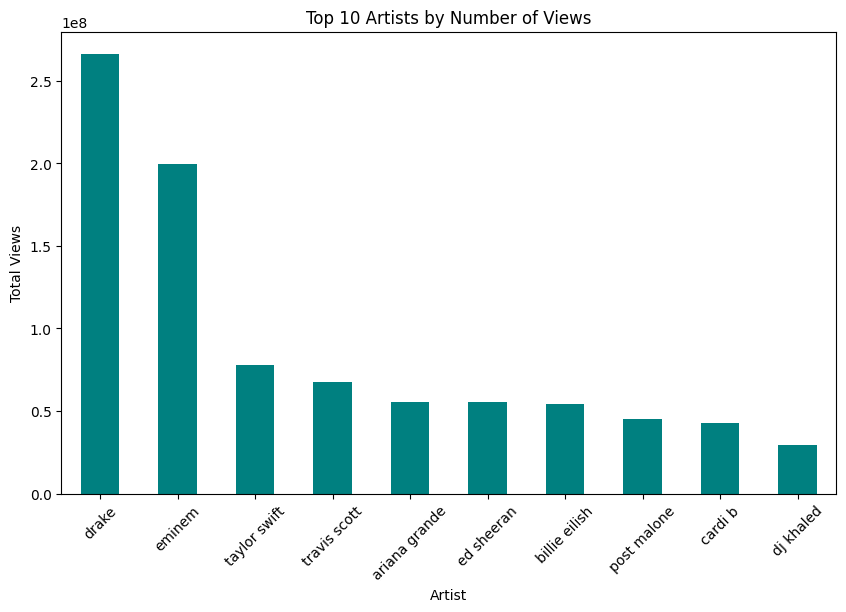

In [29]:
import matplotlib.pyplot as plt
# Sum views by artist
views_by_artist = filtered_df.groupby('artist')['views'].sum().sort_values(ascending=False).head(10)

# Create a bar chart for the top 10 artists by views
views_by_artist.plot(kind='bar', color='teal', figsize=(10, 6))
plt.title('Top 10 Artists by Number of Views')
plt.xlabel('Artist')
plt.ylabel('Total Views')
plt.xticks(rotation=45)  # Rotate labels to make them readable
plt.show()



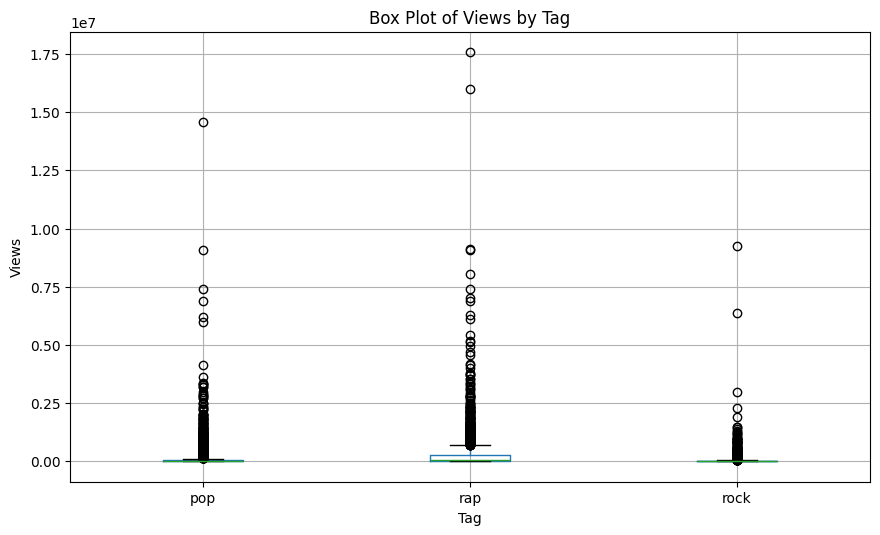

In [30]:
# Create a box plot for views grouped by tag
filtered_df.boxplot(column='views', by='tag', figsize=(10, 6))
plt.title('Box Plot of Views by Tag')
plt.xlabel('Tag')
plt.ylabel('Views')
plt.suptitle('')  # Suppress the default title to clean up the plot
plt.show()



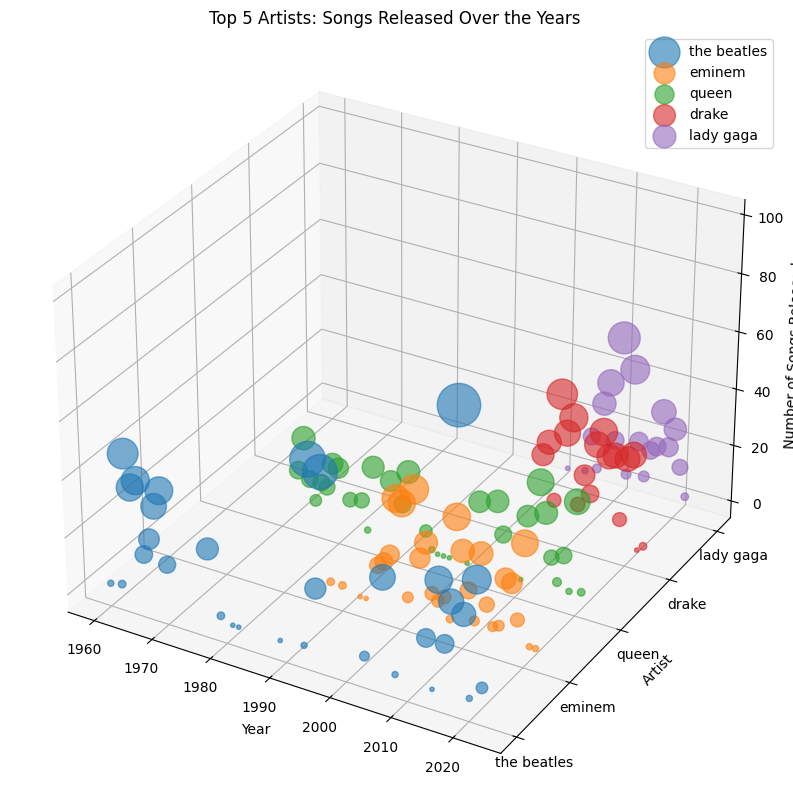

In [31]:
# Aggregate the data by artist and year
song_counts = filtered_df.groupby(['artist', 'year']).size().reset_index(name='song_count')

# Identify the top 5 artists with the most song releases
top_artists = song_counts.groupby('artist')['song_count'].sum().sort_values(ascending=False).head(5).index

# Filter the dataset to include only the top 5 artists
top_artists_data = song_counts[song_counts['artist'].isin(top_artists)]

# Create a numerical mapping for the artists
artist_mapping = {artist: i for i, artist in enumerate(top_artists)}

# Check if the DataFrame is empty before plotting
if not top_artists_data.empty:
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')

    for artist in top_artists:
        artist_data = top_artists_data[top_artists_data['artist'] == artist]
        y_values = [artist_mapping[artist]] * len(artist_data)  # Numerical value for the artist
        ax.scatter(artist_data['year'], y_values, artist_data['song_count'], label=artist, s=artist_data['song_count']*10, alpha=0.6)

    # Set ticks and labels for the y-axis
    ax.set_yticks(range(len(top_artists)))
    ax.set_yticklabels(top_artists)
    
    ax.set_xlabel('Year')
    ax.set_ylabel('Artist')
    ax.set_zlabel('Number of Songs Released')
    ax.set_title('Top 5 Artists: Songs Released Over the Years')
    ax.legend()
    plt.show()
else:
    print("No data available to plot.")

In [32]:
# Save the cleaned csv
filtered_df_csv_path = 'processed_lyrics.csv'
filtered_df.to_csv(filtered_df_csv_path, index=False)
print('processed lyrics is saved')

processed lyrics is saved


In [33]:
filtered_df.head()

,title,tag,artist,year,views,lyrics,language,processed_lyrics
22,Encore / Curtains Down,rap,eminem,2004,187204,"[Intro: 50 Cent & Eminem]\nSh-sh-sh, Shady! Af...",en,"sh-sh-sh , shady ! aftermath ! haha ! g-g-g-g ..."
75,My Name Is,rap,eminem,1999,1464039,"[Produced by Dr. Dre]\n\n[Chorus: Eminem]\nHi,...",en,"hi , my name is , what ? my name is , who ? my..."
104,Yellow Brick Road,rap,eminem,2004,308640,"[Intro: Morris Casuto, Spiro Agnew, Randy Blaz...",en,what we have to do is deal with it when these ...
144,Stan,rap,eminem,2000,3298983,[Produced by DJ Mark the 45 King]\n\n[Chorus: ...,en,"my tea's gone cold , i'm wondering why i got o..."
145,Kill You,rap,eminem,2000,982504,[Produced by Dr. Dre & Mel-Man]\n\n[Intro]\nWh...,en,when i was just a little baby boy my momma use...
